In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import os
import json
import pickle

import re
from collections import Counter

# custom imports
from data_handling import load_data, collapse_dfs, load_large
from text_preprocessing import df_processing, party_remover, party_finder

In [2]:
collapse = False
path_collapse = '/home/franzi/Git-DSR/Twitter_sentimentanalysis/Data/all_data_lda.pickle' # path where pickle file is saved

if collapse:
    all_data = collapse_dfs(aug_data)
    df_processing(all_data)
    all_data = all_data.drop_duplicates('clean_text')
    all_data['user_id'] = all_data.loc[:, 'user'].map(lambda x: x['id_str'])
    all_data.drop('user', inplace=True, axis=1)
    print('dumping data to pickle')
    with open(path_collapse, 'wb') as fid:
        pickle.dump(all_data, fid)
    print('data dumped')
else: 
    print('loading data from pickle')
    with open(path_collapse, 'rb') as fid:
        all_data = pickle.load(fid)
        print('data loaded')

loading data from pickle
data loaded


In [5]:
all_data['full_text'].values

array(['@BILD Für Sami A macht man Rundflüge. gute Migranten Flüchtlinge weißt man aus Demokratie versteht man hier nicht ☝️☝️#CSU #AfD #Bild #CSU #Bild #CSU #SPD #FDP #AFD #Bild #CSU #Bild #CSU #SPD #FDP #AFD #Bild',
       '@bembelpix @AfD_Hessen NoAFD schreiben aber keine Argumente liefern warum man die AFD nicht wählen sollte.',
       'RT @Walnusskipferl: @AssetsKater72 @dr_ecksack_ @incersu @MalteKaufmann Ich kenne nur die REPs Baden-Württemberg.\nDort trifft das zu. Die A…',
       ...,
       'RT @JochenKleiner1: Das ist doch ganz einfach wenn ich einigen unseren #Politikern zuhöre. Alle die #Asyl sagen können kommen. Ins Land sol…',
       'Kostenlose Sozial/Rechtsberatung: [https://t.co/l7UnGSZcpY]\n#poland\n#polen\n#frankreich\n#england\n#spanien\n#spanish\n#portugal\n#tsipras\n#holland\n#hollande\n#hollywood\n#luxembourg\n#schweiz\n#schweden\n#norwegian\n#österreich\n#ungarn\n#bulgaria\n#bulgarian\n#spd\n#linke\n#grüne\n#cdu\n#csu\n#fdp https://t.co/BJ0Rk0bTqX',
       'RT 

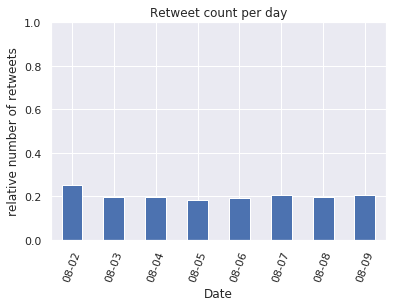

In [3]:
# Retweet count
def retweet_plot(df):    
    df['date'] = df['created_at'].dt.floor('d')
    retweet_dic = {}
    retweets = pd.DataFrame
    
    for day in df.date.unique():
        sub_df = df[df.date == day].copy()
        total_tweets = len(sub_df)
        retweet_no = sub_df.loc[:, 'full_text'].apply(lambda x: x.count('RT')).sum()
        rel_no_retweets = retweet_no/total_tweets
        retweet_dic[day] = [total_tweets, retweet_no, rel_no_retweets]
        
    retweets = pd.DataFrame.from_dict(retweet_dic, orient='index', columns=('total_tweets','retweets','rel_no_retweets'))  


    rt_plot = retweets.rel_no_retweets.plot.bar(color='b', rot=70, ylim=(0, 1), title='Retweet count per day')
    rt_plot.set(ylabel='relative number of retweets')
    rt_plot.set(xlabel='Date')
    rt_plot.set_xticklabels(retweets.index.strftime("%m-%d"))
    
    

retweet_plot(all_data)

In [31]:
def retweeting_users(df):
    df['date'] = df['created_at'].dt.floor('d')
    
    rel_tweeter = {}
    retweets = {}
    tweeter = {}
    
    rel_tweeter_df = pd.DataFrame()
    tweeter_df = pd.DataFrame() 
    retweets_df = pd.DataFrame()
    
    for day in df.date.unique():
        sub_df = df[df.date == day].copy()
        tweeted = sub_df.groupby('user_id')['full_text'].count()
        sub_df['retweeted'] = sub_df['full_text'].apply(lambda x: x.count('RT'))
        retweeting = sub_df.groupby('user_id')['retweeted'].sum()
        rel_tweeting = tweeted.rtruediv(retweeting) 
        rel_tweeter[day] = rel_tweeting
        tweeter[day] = tweeted
        retweets[day] = retweeting 
    
#     rel_tweeter_df = pd.DataFrame(rel_tweeter).transpose()
#     tweeter_df = pd.DataFrame(tweeter).transpose()
#     retweets_df = pd.DataFrame(retweets).transpose()

    return rel_tweeter, retweets, tweeter

In [32]:
rel_tweeter, retweets, tweeter = retweeting_users(all_data)

In [40]:
tweeters = pd.DataFrame(tweeter).transpose()

In [53]:
rel_retweets_df = pd.DataFrame(rel_tweeter)

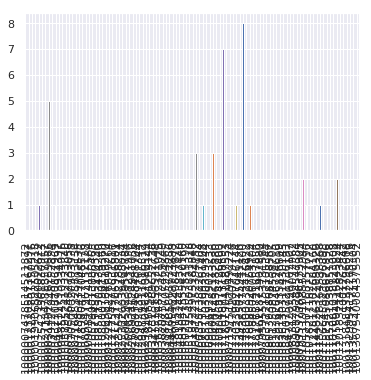

In [47]:
tweeters.iloc[0, :100].plot.bar()

In [95]:
text = all_data.loc['2018-08-02', 'full_text'].map(lambda x: x.replace('ü','ue'))

In [100]:
parties = text.map(party_finder).map(", ".join)

In [101]:
parties = parties.sort_values()
parties = parties.dropna()

In [102]:
parties

created_at
2018-08-02 09:11:12                      
2018-08-02 10:47:32                      
2018-08-02 10:43:52                      
2018-08-02 19:42:00                      
2018-08-02 09:20:55                      
2018-08-02 19:44:30                      
2018-08-02 09:20:40                      
2018-08-02 12:02:00                      
2018-08-02 09:20:15                      
2018-08-02 19:45:00                      
2018-08-02 09:19:54                      
2018-08-02 09:19:51                      
2018-08-02 19:45:36                      
2018-08-02 19:47:28                      
2018-08-02 09:17:15                      
2018-08-02 19:48:19                      
2018-08-02 12:03:31                      
2018-08-02 19:50:30                      
2018-08-02 09:15:11                      
2018-08-02 19:50:47                      
2018-08-02 19:51:18                      
2018-08-02 09:14:40                      
2018-08-02 09:14:35                      
2018-08-02 19:51:36    

In [103]:
counts = parties.map(lambda x: x.replace('ü', 'ue')).value_counts()

In [109]:
counts = counts.drop(labels='')

In [110]:
counts.duplicated

AfD                                       6663
SPD                                       1136
LINKE                                     1013
CSU                                        880
Gruene                                     724
FDP                                        587
CDU                                        370
CDU, CSU                                   198
AfD, LINKE                                 180
AfD, Gruene                                178
AfD, SPD                                   168
SPD, CDU                                   133
AfD, CSU                                   129
SPD, CDU, CSU                               82
SPD, Gruene                                 82
LINKE, Gruene                               79
SPD, LINKE                                  77
AfD, CDU, CSU                               68
AfD, CDU                                    61
SPD, LINKE, Gruene                          61
AfD, SPD, CDU, CSU, FDP, LINKE, Gruene      43
AfD, SPD, CDU